<a href="https://colab.research.google.com/github/KGANESHKUMARK/PythonBits/blob/main/Group100_IR_ProblemSet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Information Retrieval - Assignment 2


### Group 98  -  Problem Set - 10

In [ ]:
### Group Members Name with Student ID:#
from IPython.display import display, HTML
html_content = """

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <style>
        .table {
            display: table;
            width: 70%;
            border-collapse: collapse;
        }
        .table-row {
            display: table-row;
        }
        .table-cell {
            display: table-cell;
            border: 1px solid #dddddd;
            padding: 8px;
        }
        .header {
            background-color: #fffff;
            font-weight: bold;
            font-size: 100%;
        }
    </style>
</head>
<body>
 <h3>Group Members Name with Student ID:</h3>

<div class="table" style="float: left">
    <div class="table-row header">
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Name</div>
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Email ID</div>
    </div>
    <div class="table-row">
        <div class="table-cell">1.</div>
        <div class="table-cell">GANESHKUMAR KARUPPAIAH</div>
        <div class="table-cell">2023aa05600</div>
        <div class="table-cell">2023aa05600@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">2.</div>
        <div class="table-cell">KOLLURI VENKATESWARA SWAROOP</div>
        <div class="table-cell">2023aa05945</div>
        <div class="table-cell">2023aa05945@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">3.</div>
        <div class="table-cell">RAJESH J</div>
        <div class="table-cell">2023aa05859</div>
        <div class="table-cell">2023aa05859@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">4.</div>
        <div class="table-cell">VIJAYA LAKSHMI R</div>
        <div class="table-cell">2023aa05341</div>
        <div class="table-cell">2023aa05341@wilp.bits-pilani.ac.in</div>
    </di    v>
</d
</div>
</html>
"""
display(HTML(html_content))

In [ ]:
#import the required libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [ ]:
# pip install bs4

In [ ]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ganesh
[nltk_data]     AI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows of the dataset
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
# Display a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.duplicated().sum()

418

In [ ]:
data = df.drop_duplicates(subset=['review']).reset_index(drop=True)

In [ ]:
data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

C:\Users\Ganesh AI\AppData\Local\Temp\ipykernel_9704\1286082398.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x='sentiment', data=df, palette='viridis')
C:\Users\Ganesh AI\AppData\Local\Temp\ipykernel_9704\1286082398.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(['Negative', 'Positive'])


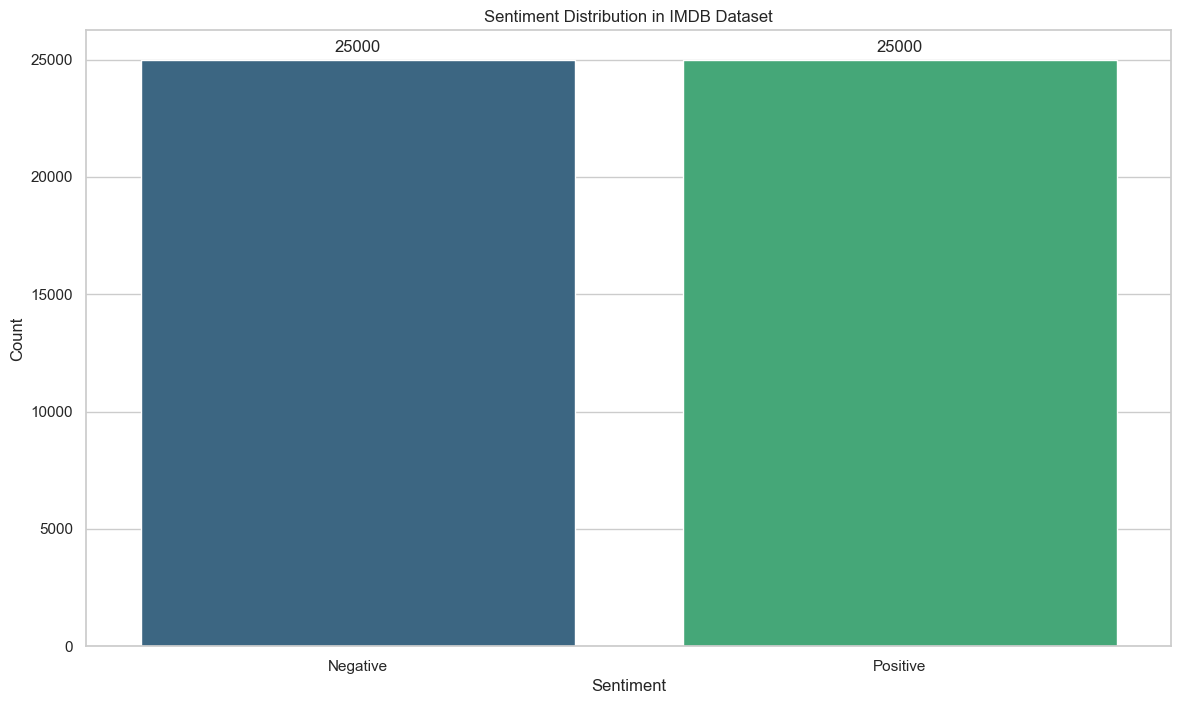

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the count plot
f = sns.countplot(x='sentiment', data=df, palette='viridis')
f.set_title("Sentiment Distribution in IMDB Dataset")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Add the count on top of each bar
for p in f.patches:
    f.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

# Show the plot
plt.show()

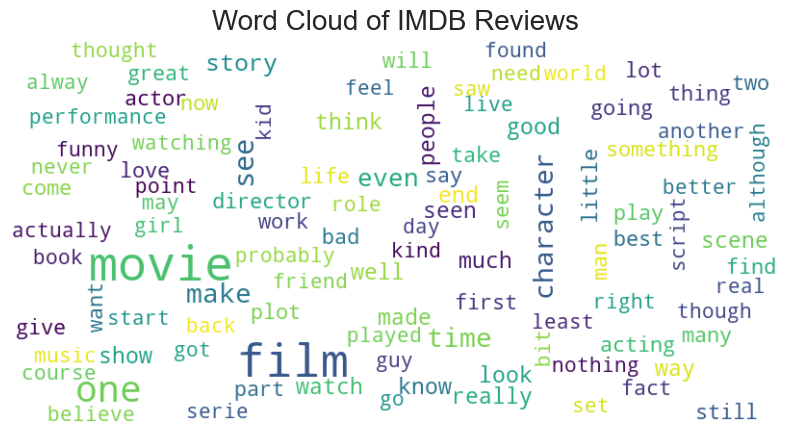

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Combine all reviews into a single string
text = " ".join(review for review in df.review)

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=50,
    max_words=100,
    background_color="white",
    stopwords=stopwords,
    colormap='viridis'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of IMDB Reviews", fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import os

class Tokenizer:
    def __init__(self):
        # Load English stopwords from NLTK and store them in a set for fast lookup
        self.stopwords_en = set(stopwords.words("english"))

        # Specify the HTML parser to be used by BeautifulSoup
        self.html_parser = "html.parser"

        # Compile a regular expression to match non-alphabetic characters
        self.non_alpha_pattern = re.compile(r"[^a-z\s]+", flags=re.IGNORECASE)

        # Compile a regular expression to match one or more whitespace characters
        self.whitespace_pattern = re.compile(r"\s+")

    def preprocess_text(self, text):
        # Check if the input is a filename and read the file content
        if os.path.isfile(text):
            with open(text, 'r', encoding='utf-8') as file:
                text = file.read()

        # Now pass the text content to BeautifulSoup
        no_html = BeautifulSoup(text, self.html_parser).get_text()
        return no_html

    def clean(self, text):
        # Remove HTML tags using BeautifulSoup
        no_html = self.preprocess_text(text)

        # Replace non-alphabetic characters with a space
        clean = self.non_alpha_pattern.sub(" ", no_html)

        # Replace multiple whitespace characters with a single space and strip leading/trailing spaces
        return self.whitespace_pattern.sub(" ", clean).strip()

    def tokenize(self, text):
        # Clean the text and convert it to lowercase
        clean = self.clean(text).lower()

        # Split the cleaned text into words and filter out stopwords and empty strings
        return [w for w in re.split(r"\W+", clean) if w and w not in self.stopwords_en]

    # Function to preprocess the content of the files
    def preprocess_content(files_contents):
        stop_words = set(stopwords.words('english'))  # Set of English stopwords
        ps = PorterStemmer()  # Porter Stemmer for stemming
        lemmatizer = WordNetLemmatizer()  # WordNet Lemmatizer for lemmatization

        # Tokenization
        tokens = word_tokenize(files_contents)

        # Stopwords Removal
        filtered_tokens = [w for w in tokens if not w.lower() in stop_words]

        # Special Characters Removal (commented out)
        # filtered_tokens = [re.sub(r'[^\w\s]', '', w) for w in filtered_tokens]

        # Stemming (commented out)
        # stemmed_tokens = [ps.stem(w) for w in filtered_tokens]

        # Lemmatization (commented out)
        # lemmatized_tokens = [lemmatizer.lemmatize(w) for w in stemmed_tokens]

        # Joining the tokens back into a string
        preprocessed_content = ' '.join(filtered_tokens)

        return filtered_tokens  # Return the filtered tokens

In [ ]:
import numpy as np
import math
from collections import defaultdict, Counter
import os

class MultinomialNaiveBayes:
    def __init__(self, classes, tokenizer):
        """
        Initialize the Multinomial Naive Bayes classifier.

        Parameters:
        classes (list): List of class labels.
        tokenizer (object): Tokenizer object with a tokenize method.
        """
        self.tokenizer = tokenizer
        self.classes = classes

    def group_by_class(self, X, y):
        """
        Group the data by class.

        Parameters:
        X (array-like): Feature data.
        y (array-like): Labels.

        Returns:
        dict: Dictionary with class labels as keys and corresponding data as values.
        """
        data = {c: X[np.where(y == c)] for c in self.classes}
        return data

    def fit(self, X, y):
        """
        Fit the model to the training data.

        Parameters:
        X (array-like): Feature data.
        y (array-like): Labels.

        Returns:
        self: Fitted model.
        """
        self.n_class_items = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        grouped_data = self.group_by_class(X, y)

        for c, data in grouped_data.items():
            self.n_class_items[c] = len(data)
            self.log_class_priors[c] = math.log(self.n_class_items[c] / n)
            self.word_counts[c] = defaultdict(int)

            for text in data:
                counts = Counter(self.tokenizer.tokenize(text))
                for word, count in counts.items():
                    self.vocab.add(word)
                    self.word_counts[c][word] += count

        return self

    def laplace_smoothing(self, word, text_class):
        """
        Apply Laplace smoothing to calculate the log probability of a word given a class.

        Parameters:
        word (str): The word to calculate the probability for.
        text_class (str): The class label.

        Returns:
        float: Log probability of the word given the class.
        """
        num = self.word_counts[text_class][word] + 1
        denom = self.n_class_items[text_class] + len(self.vocab)
        return math.log(num / denom)

    def preprocess_text(self, text):
        # Check if the input is a filename and read the file content
        if os.path.isfile(text):
            with open(text, 'r', encoding='utf-8') as file:
                text = file.read()

        # Now pass the text content to BeautifulSoup
        no_html = BeautifulSoup(text, self.html_parser).get_text()
        return no_html

    def predict(self, X):
        """
        Predict the class labels for the given data.

        Parameters:
        X (array-like): Feature data.

        Returns:
        list: Predicted class labels.
        """
        result = []
        for text in X:
            class_scores = {c: self.log_class_priors[c] for c in self.classes}
            words = set(self.tokenizer.tokenize(text))

            for word in words:
                if word not in self.vocab:
                    continue

                for c in self.classes:
                    log_w_given_c = self.laplace_smoothing(word, c)
                    class_scores[c] += log_w_given_c

            result.append(max(class_scores, key=class_scores.get))

        return result

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

X = df['review'].values
y = df['sentiment'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)
mnb_pred = mnb.predict(X_test_vec)

In [ ]:
MNBN = MultinomialNaiveBayes(
    classes=np.unique(y),
    tokenizer=Tokenizer()
).fit(X_train, y_train)



C:\Users\Ganesh AI\AppData\Local\Temp\ipykernel_9704\1801889745.py:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  no_html = BeautifulSoup(text, self.html_parser).get_text()


In [ ]:
y_hat = MNBN.predict(X_test)
accuracy_score(y_test, y_hat)
print(classification_report(y_test, y_hat))

C:\Users\Ganesh AI\AppData\Local\Temp\ipykernel_9704\1801889745.py:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  no_html = BeautifulSoup(text, self.html_parser).get_text()


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6157
           1       0.86      0.88      0.87      6343

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



In [ ]:
cnf_matrix = confusion_matrix(y_test, y_hat)
cnf_matrix

array([[5213,  944],
       [ 765, 5578]], dtype=int64)

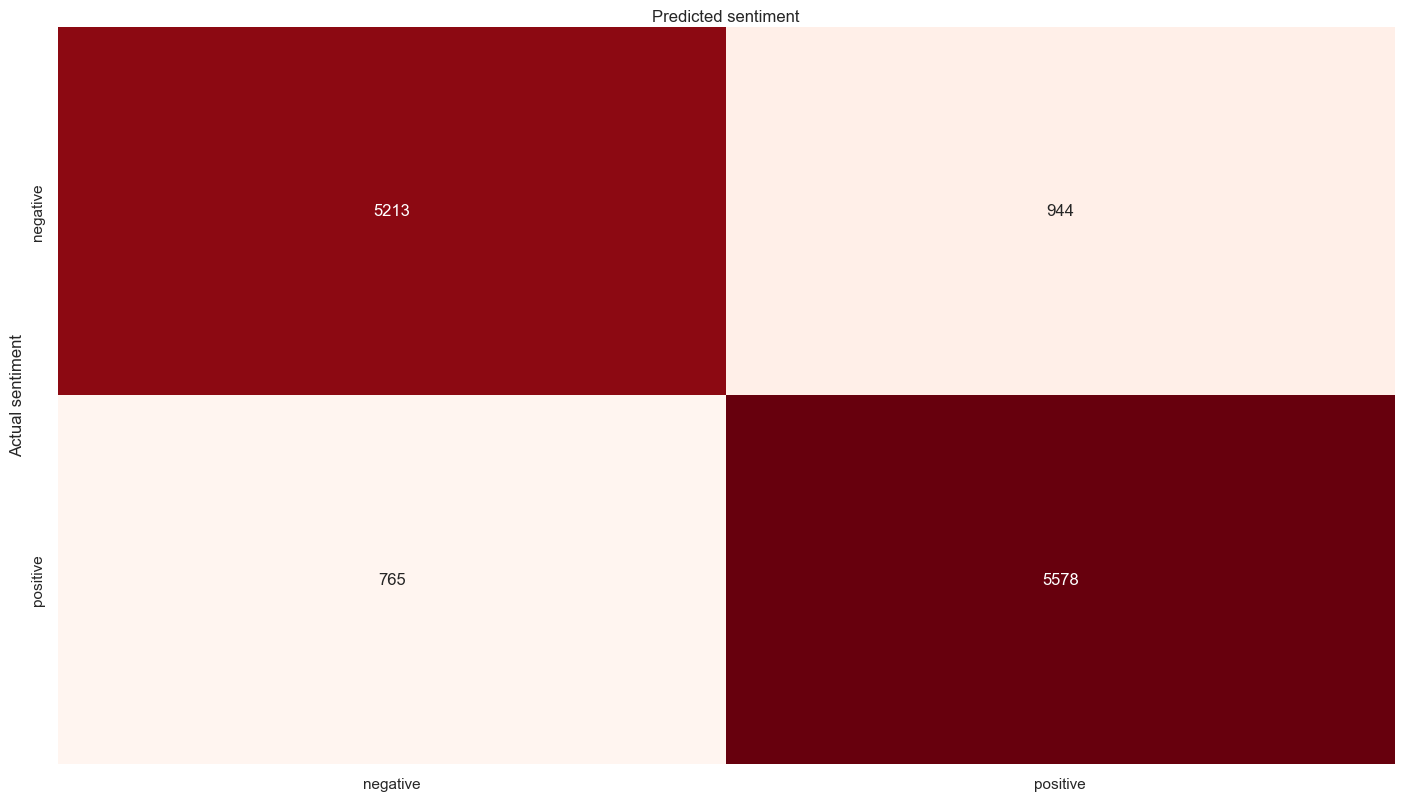

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define class names for the heatmap
class_names = ["negative", "positive"]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(
    pd.DataFrame(cnf_matrix),
    annot=True,
    cmap="Reds",
    fmt="d",
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names,
    ax=ax  # Pass the axis to Seaborn
)

# Set the x-axis label position to the top
ax.xaxis.set_label_position('top')

# Adjust the layout to make room for the labels
plt.tight_layout()

# Set the labels for the axes
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment')

# Display the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize and train the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train_vec, y_train)

BernoulliNB()

In [ ]:
# Make predictions on the test set
y_pred = bnb.predict(X_test_vec)

In [ ]:
# Make predictions on the test set
y_pred = bnb.predict(X_test_vec)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["negative", "positive"])
print(report)

# Generate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Accuracy: 0.85024
              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      6157
    positive       0.88      0.81      0.85      6343

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500

[[5462  695]
 [1177 5166]]


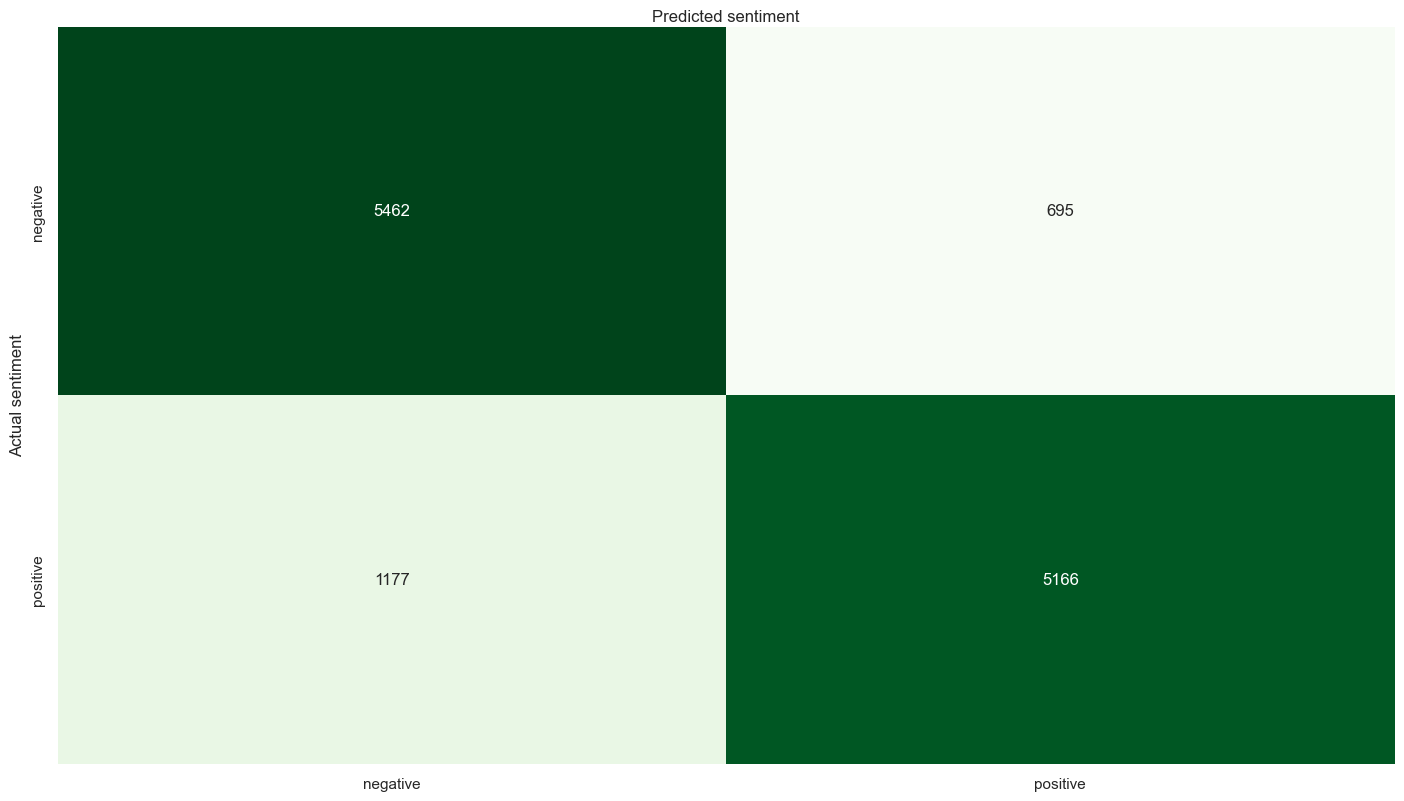

In [ ]:
# Define class names for the heatmap
class_names = ["negative", "positive"]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the heatmap with the "Reds" colormap
sns.heatmap(
    pd.DataFrame(cnf_matrix),
    annot=True,
    cmap="Greens",
    fmt="d",
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names,
    ax=ax  # Pass the axis to Seaborn
)

# Set the x-axis label position to the top
ax.xaxis.set_label_position('top')

# Adjust the layout to make room for the labels
plt.tight_layout()

# Set the labels for the axes
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment')

# Display the plot
plt.show()

### 2. Compare their accuracy, precision, recall, and F1-score and determine which model performs better under different conditions.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Multinomial Naive Bayes
y_pred_mnb = mnb.predict(X_test_vec)
mnb_accuracy = accuracy_score(y_test, y_pred_mnb)
mnb_precision = precision_score(y_test, y_pred_mnb)
mnb_recall = recall_score(y_test, y_pred_mnb)
mnb_f1 = f1_score(y_test, y_pred_mnb)

# Evaluate Bernoulli Naive Bayes
y_pred_bnb = bnb.predict(X_test_vec)
bnb_accuracy = accuracy_score(y_test, y_pred_bnb)
bnb_precision = precision_score(y_test, y_pred_bnb)
bnb_recall = recall_score(y_test, y_pred_bnb)
bnb_f1 = f1_score(y_test, y_pred_bnb)

# Print the evaluation metrics
print("Multinomial Naive Bayes:")
print(f"Accuracy: {mnb_accuracy}")
print(f"Precision: {mnb_precision}")
print(f"Recall: {mnb_recall}")
print(f"F1-score: {mnb_f1}")

print("\nBernoulli Naive Bayes:")
print(f"Accuracy: {bnb_accuracy}")
print(f"Precision: {bnb_precision}")
print(f"Recall: {bnb_recall}")
print(f"F1-score: {bnb_f1}")

Multinomial Naive Bayes:
Accuracy: 0.8564
Precision: 0.8753714097061737
Recall: 0.8360397288349362
F1-score: 0.8552536085799533

Bernoulli Naive Bayes:
Accuracy: 0.85024
Precision: 0.8814195529773077
Recall: 0.8144411161910767
F1-score: 0.8466076696165191


To compare the performance of the Multinomial Naive Bayes and Bernoulli Naive Bayes models, let's analyze their accuracy, precision, recall, and F1-score metrics:

Multinomial Naive Bayes:
Accuracy: 0.8564
Precision: 0.8754
Recall: 0.8360
F1-score: 0.8553
Bernoulli Naive Bayes:
Accuracy: 0.8502
Precision: 0.8814
Recall: 0.8144
F1-score: 0.8466
Comparison:
Accuracy:

Multinomial Naive Bayes: 0.8564
Bernoulli Naive Bayes: 0.8502
Better: Multinomial Naive Bayes
Precision:

Multinomial Naive Bayes: 0.8754
Bernoulli Naive Bayes: 0.8814
Better: Bernoulli Naive Bayes
Recall:

Multinomial Naive Bayes: 0.8360
Bernoulli Naive Bayes: 0.8144
Better: Multinomial Naive Bayes
F1-score:

Multinomial Naive Bayes: 0.8553
Bernoulli Naive Bayes: 0.8466
Better: Multinomial Naive Bayes
Conclusion:
Multinomial Naive Bayes performs better in terms of accuracy, recall, and F1-score.
Bernoulli Naive Bayes performs slightly better in terms of precision.
Overall, the Multinomial Naive Bayes model seems to perform better under most conditions, making it a more balanced choice for this dataset. However, if precision is more critical for your application, the Bernoulli Naive Bayes model might be preferable.